# UTS PPW

## 1.	Lakukan analisa klasifikasikan berita dengan extraksi fitur model topik modelling dengan classifier naïve bayes dan SVM

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans
import re

## Fungsi Pembersihan

In [2]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [w for w in text.split() if len(w) > 2]
    return ' '.join(words)

## Load Berita

In [3]:
import pandas as pd

df = pd.read_csv("Berita.csv")

# Melihat struktur data
print("Jumlah baris dan kolom:", df.shape)
print("\nNama kolom:", df.columns.tolist())

df.head()


Jumlah baris dan kolom: (1500, 6)

Nama kolom: ['No', 'judul', 'berita', 'tanggal', 'kategori', 'link']


,No,judul,berita,tanggal,kategori,link
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...


## Prepocessing

In [4]:
!pip install Sastrawi nltk

In [5]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Ambil stopword otomatis
stop_factory = StopWordRemoverFactory()
stop_id = set(stop_factory.get_stop_words())
stop_en = set(stopwords.words('english'))
stops = stop_id.union(stop_en)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)        # hapus URL
    text = re.sub(r"[^a-z\s]", " ", text)       # hapus simbol
    text = re.sub(r"\s+", " ", text).strip()    # hapus spasi berlebih
    tokens = [t for t in text.split() if t not in stops and len(t) > 2]
    return " ".join(tokens)

# Kolom teks dan label
text_col = "berita"
label_col = "kategori"

df["cleaned_text"] = df[text_col].apply(clean_text)

df[[text_col, "cleaned_text", label_col]].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,berita,cleaned_text,kategori
0,Menteri Koordinator (Menko) Bidang Perekonomia...,menteri koordinator menko bidang perekonomian ...,Ekonomi
1,"Dalam rangka memeriahkan hari jadi ke-50, PT S...",rangka memeriahkan hari jadi surabaya industri...,Ekonomi
2,Wacana Presiden Prabowo Subianto akan membentu...,wacana presiden prabowo subianto membentuk mem...,Ekonomi
3,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,bpjs ketenagakerjaan kementerian agama kemenag...,Ekonomi
4,Pemerintah akan segera membentuk Satuan Tugas ...,pemerintah segera membentuk satuan tugas pemut...,Ekonomi
5,Menko Bidang Infrastruktur dan Pembangunan Kew...,menko bidang infrastruktur pembangunan kewilay...,Ekonomi
6,Kepala Badan Gizi Nasional Dadan Hindayana men...,kepala badan gizi nasional dadan hindayana men...,Ekonomi
7,Menteri Koordinator Bidang Pangan Zulkifli Has...,menteri koordinator bidang pangan zulkifli has...,Ekonomi
8,Uji coba alias commissioning pembangkit listri...,uji coba alias commissioning pembangkit listri...,Ekonomi
9,Anak crazy rich pengusaha sawit Kalimantan Sam...,anak crazy rich pengusaha sawit kalimantan sam...,Ekonomi


## Ekstraksi Fitur

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

count_vec = CountVectorizer(max_df=0.95, min_df=5)
dtm = count_vec.fit_transform(df["cleaned_text"])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
doc_topic = lda.fit_transform(dtm)

# tampilkan topik
feature_names = count_vec.get_feature_names_out()
n_top_words = 5
for idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    print(f"Topik {idx+1}: {', '.join(top_words)}")

Topik 1: laut, pagar, tersebut, jakarta, tangerang
Topik 2: indonesia, timnas, pemain, piala, gol
Topik 3: indonesia, persen, program, negara, tahun
Topik 4: tersebut, kasus, presiden, kpk, kata
Topik 5: israel, gaza, senjata, gencatan, orang


In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# -----------------------------
# 1. Contoh Load Dataset
# -----------------------------
# df = pd.read_csv("berita.csv")  # pastikan kolom: 'cleaned_text' dan 'kategori'
# Untuk demo, kita asumsikan df sudah ada

# -----------------------------
# 2. Preprocessing & LDA
# -----------------------------
n_topics = 5  # jumlah topik
count_vec = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X_count = count_vec.fit_transform(df['cleaned_text'])

lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_matrix = lda.fit_transform(X_count)  # hasil LDA: n_samples x n_topics

# -----------------------------
# 3. Buat df_final dari hasil LDA
# -----------------------------
topic_cols = [f"Topik_{i+1}" for i in range(n_topics)]
df_final = pd.DataFrame(lda_matrix, columns=topic_cols)

# Tambahkan kolom kategori
df_final['kategori'] = df['kategori'].values

# -----------------------------
# 4. Format angka topik (6 desimal) untuk tampilan
# -----------------------------
df_display = df_final.copy()
for col in topic_cols:
    df_display[col] = df_display[col].map(lambda x: f"{x:.6f}")

# -----------------------------
# 5. Buat snippet clean_text (0-50 karakter)
# -----------------------------
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x[:50] + "..." if len(x) > 50 else x)

df_excel = pd.concat(
    [df[["cleaned_text", "kategori"]], df_display[topic_cols]],
    axis=1
)

# -----------------------------
# 7. Tampilkan 10 data pertama
# -----------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df_excel.head(10))

# -----------------------------
# 8. Simpan ke CSV
# -----------------------------
df_excel.to_csv("hasil_lda_berita.csv", index=False, encoding='utf-8-sig')
print("✅ File CSV berhasil disimpan: hasil_lda_berita.csv")


                                        cleaned_text kategori   Topik_1   Topik_2   Topik_3   Topik_4   Topik_5
0  menteri koordinator menko bidang perekonomian ...  Ekonomi  0.000670  0.101171  0.000671  0.000664  0.896824
1  rangka memeriahkan hari jadi surabaya industri...  Ekonomi  0.000621  0.000616  0.036058  0.011478  0.951227
2  wacana presiden prabowo subianto membentuk mem...  Ekonomi  0.000792  0.000770  0.000782  0.000773  0.996883
3  bpjs ketenagakerjaan kementerian agama kemenag...  Ekonomi  0.043518  0.001032  0.001042  0.001036  0.953372
4  pemerintah segera membentuk satuan tugas pemut...  Ekonomi  0.000833  0.134684  0.000823  0.000816  0.862843
5  menko bidang infrastruktur pembangunan kewilay...  Ekonomi  0.000804  0.000789  0.000794  0.000790  0.996823
6  kepala badan gizi nasional dadan hindayana men...  Ekonomi  0.000891  0.008582  0.068877  0.000883  0.920767
7  menteri koordinator bidang pangan zulkifli has...  Ekonomi  0.000775  0.000772  0.000779  0.000772  0

## Ektraksi fitur tambahan dengan TF-IDF untuk classifier

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text']) # Corrected DataFrame name
y = df['kategori'] # Corrected DataFrame name

## Split data untuk traning dan testing

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Klasifikasi dengan Naive Bayes dan SVM

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Naïve Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# SVM
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("=== Hasil Klasifikasi Naïve Bayes ===")
print(classification_report(y_test, y_pred_nb))

print("\n=== Hasil Klasifikasi SVM ===")
print(classification_report(y_test, y_pred_svm))

=== Hasil Klasifikasi Naïve Bayes ===
               precision    recall  f1-score   support

      Ekonomi       0.81      0.84      0.82        73
Internasional       0.87      0.85      0.86        84
     Nasional       0.75      0.80      0.77        70
     Olahraga       0.94      0.88      0.91        73

     accuracy                           0.84       300
    macro avg       0.84      0.84      0.84       300
 weighted avg       0.84      0.84      0.84       300


=== Hasil Klasifikasi SVM ===
               precision    recall  f1-score   support

      Ekonomi       0.87      0.89      0.88        73
Internasional       0.92      0.79      0.85        84
     Nasional       0.71      0.83      0.76        70
     Olahraga       0.92      0.89      0.90        73

     accuracy                           0.85       300
    macro avg       0.85      0.85      0.85       300
 weighted avg       0.86      0.85      0.85       300



## Visualisasi sebaran topik

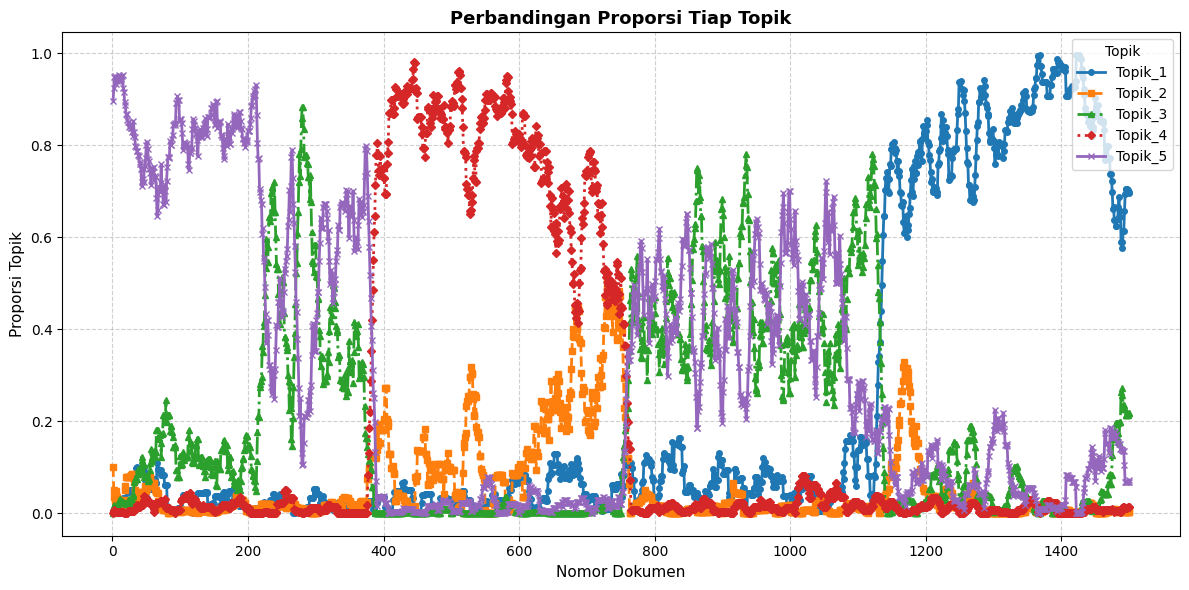

In [ ]:
import matplotlib.pyplot as plt

# Kolom topik
topik_cols = [f"Topik_{i+1}" for i in range(5)]

# Ambil data proporsi topik dari df_final
topik_data = df_final[topik_cols]

# Rolling mean dengan window 15
topik_data_smooth = topik_data.rolling(window=15, min_periods=1).mean()

# Style unik untuk tiap topik
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
linestyles = ['-', '--', '-.', ':', '-']
markers = ['o', 's', '^', 'D', 'x']

# Plot line chart
plt.figure(figsize=(12,6))
for i, col in enumerate(topik_cols):
    plt.plot(
        range(1, len(topik_data_smooth)+1),
        topik_data_smooth[col],
        label=col,
        color=colors[i],
        linestyle=linestyles[i],
        marker=markers[i],
        markersize=4,
        linewidth=2
    )

# Pengaturan visualisasi
plt.title("Perbandingan Proporsi Tiap Topik", fontsize=13, fontweight='bold')
plt.xlabel("Nomor Dokumen", fontsize=11)
plt.ylabel("Proporsi Topik", fontsize=11)
plt.legend(title="Topik", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 2.	Lakukan  analisa clutering dokumen pada data email berikut

In [15]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding='latin-1', usecols=['id', 'Text'])
df.head()

,id,Text
0,1,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,2,Ok lar... Joking wif u oni...
2,3,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,4,U dun say so early hor... U c already then say...
4,5,"Nah I don't think he goes to usf, he lives around here though"


## Bersihkan Data

In [23]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords (sekali saja)
nltk.download('stopwords')

# Baca dataset (pastikan nama file sesuai)
df = pd.read_csv('spam.csv', encoding='latin-1')

# Ganti nama kolom teks sesuai dataset
text_col = 'Text'

# Ambil isi teks
texts = df[text_col].astype(str)

# Gunakan stopword bahasa Inggris
stop_words = stopwords.words('english')

# Fungsi pembersihan teks
def preprocess(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

# Tambahkan kolom baru hasil bersih
df['clean_text'] = texts.apply(preprocess)

# Simpan hasil ke file CSV baru
output_file = 'clean_spam.csv'
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"Hasil preprocessing disimpan ke file: {output_file}")

# Tampilkan 10 baris pertama dalam format tabel polos
from IPython.display import display
display(df[[text_col, 'clean_text']].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Hasil preprocessing disimpan ke file: clean_spam.csv


,Text,clean_text
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though
5,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",freemsg hey darling 3 weeks word back id like fun still tb ok xxx std chgs send å£150 rcv
6,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aids patent
7,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune
8,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,winner valued network customer selected receivea å£900 prize reward claim call 09061701461 claim code kl341 valid 12 hours
9,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030


## TF-IDF

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# --- 1. Load CSV ---
df = pd.read_csv("clean_spam.csv")

# --- 2. Tentukan kolom teks yang benar ---
text_col = "isi_clean"
if text_col not in df.columns:
    possible_cols = [c for c in df.columns if 'clean' in c.lower() or 'text' in c.lower()]
    if possible_cols:
        text_col = possible_cols[0]  # pakai kolom fallback tanpa print peringatan
    else:
        raise KeyError("Kolom teks bersih tidak ditemukan dalam dataset!")

# --- 3. Pastikan kolom teks tidak kosong ---
df[text_col] = df[text_col].fillna("")

# --- 4. Inisialisasi TF-IDF Vectorizer ---
vectorizer = TfidfVectorizer(max_features=1000)

# --- 5. Fit dan transform ---
X_tfidf = vectorizer.fit_transform(df[text_col])

# --- 6. Buat DataFrame hasil TF-IDF ---
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# --- 7. Tambahkan kolom id_spam jika ada ---
if "id_spam" in df.columns:
    tfidf_df.insert(0, "id_spam", df["id_spam"].values)

# --- 8. Tampilkan info rows x columns ---
print(f"TF-IDF DataFrame: {tfidf_df.shape[0]} baris × {tfidf_df.shape[1]} kolom")

# --- 9. Tampilkan preview hasil TF-IDF ---
preview_rows = 10
display(tfidf_df.head(preview_rows))

# --- 10. Simpan hasil ke CSV ---
tfidf_df.to_csv("TFIDF_spam.csv", index=False, encoding="utf-8-sig")
print("✅ Hasil TF-IDF berhasil disimpan ke 'TFIDF_spam.csv'")

TF-IDF DataFrame: 5572 baris × 1000 kolom


000   03   04  0800  08000839402  08000930705   10  100  1000  10p        11        12  12hrs  150  150p  150ppm   16   18  1st   20  200  2000  2003  250  2lands  2nd   30  350        50  500  5000  750  800  8007  86688  87066  abiola  able  about  abt   ac  account  actually  address  aft  after  afternoon  again  age  ago   ah  aight       all  almost  alone  already  alright  also  always   am  amp   an      and  angry  another  ans  answer  any  anyone  anything  anytime  anyway     apply  ard  are  area    around        as  asap  ask  askd  asked  asking  ass   at  attempt  auction  available  await  award  awarded  away  awesome   b4  babe  baby      back  bad  balance  bank  bath  bathe  bcoz   be  beautiful  because  bed      been  before  being  believe  best  better  between  big  bill  birthday  bit  blood  blue  bonus  book  booked  bored  both  bout  box  boy  boytoy  break  bring   brother  bslvyl   bt  bus  busy  but  buy   by      call  call2optout  called  \
0  0.0  0.0  0.0   0.0          0.0          0.0  0.0  0.0   0.0  0.0  0.000000  0.000000    0.0  0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0  0.0  0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0    0.0    0.0     0.0   0.0    0.0  0.0  0.0      0.0       0.0      0.0  0.0    0.0        0.0    0.0  0.0  0.0  0.0    0.0  0.000000     0.0    0.0   0.0000      0.0   0.0     0.0  0.0  0.0  0.0  0.00000    0.0      0.0  0.0     0.0  0.0     0.0       0.0      0.0     0.0  0.000000  0.0  0.0   0.0  0.000000  0.000000   0.0  0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0   0.359342    0.0    0.0      0.0   0.0      0.0  0.0   0.0   0.0  0.000000  0.0      0.0   0.0   0.0    0.0   0.0  0.0        0.0      0.0  0.0  0.000000     0.0    0.0      0.0   0.0     0.0      0.0  0.0   0.0       0.0  0.0    0.0   0.0    0.0   0.0     0.0    0.0   0.0   0.0  0.0  0.0     0.0    0.0    0.0  0.000000     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000          0.0     0.0   
1  0.0  0.0  0.0   0.0          0.0          0.0  0.0  0.0   0.0  0.0  0.000000  0.000000    0.0  0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0  0.0  0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0    0.0    0.0     0.0   0.0    0.0  0.0  0.0      0.0       0.0      0.0  0.0    0.0        0.0    0.0  0.0  0.0  0.0    0.0  0.000000     0.0    0.0   0.0000      0.0   0.0     0.0  0.0  0.0  0.0  0.00000    0.0      0.0  0.0     0.0  0.0     0.0       0.0      0.0     0.0  0.000000  0.0  0.0   0.0  0.000000  0.000000   0.0  0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0   0.000000    0.0    0.0      0.0   0.0      0.0  0.0   0.0   0.0  0.000000  0.0      0.0   0.0   0.0    0.0   0.0  0.0        0.0      0.0  0.0  0.000000     0.0    0.0      0.0   0.0     0.0      0.0  0.0   0.0       0.0  0.0    0.0   0.0    0.0   0.0     0.0    0.0   0.0   0.0  0.0  0.0     0.0    0.0    0.0  0.000000     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000          0.0     0.0   
2  0.0  0.0  0.0   0.0          0.0          0.0  0.0  0.0   0.0  0.0  0.000000  0.000000    0.0  0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0  0.0  0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0    0.0    0.0     0.0   0.0    0.0  0.0  0.0      0.0       0.0      0.0  0.0    0.0        0.0    0.0  0.0  0.0  0.0    0.0  0.000000     0.0    0.0   0.0000      0.0   0.0     0.0  0.0  0.0  0.0  0.00000    0.0      0.0  0.0     0.0  0.0     0.0       0.0      0.0     0.0  0.233341  0.0  0.0   0.0  0.000000  0.000000   0.0  0.0   0.0    0.0     0.0  0.0  0.0      0.0      0.0   0.000000    0.0    0.0      0.0   0.0      0.0  0.0   0.0   0.0  0.000000  0.0      0.0   0.0   0.0    0.0   0.0  0.0        0.0      0.0  0.0  0.000000     0.0    0.0      0.0   0.0     0.0      0.0  0.0   0.0       0.0  0.0    0.0   0.0    0.0   0.0     0.0    0.0   0.0   0.0  0.0  0.0     0.0    0.0    0.0  0.000000     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.000000          0.0     0.0   
3  0.0  0.0  0.0   0.0 

✅ Hasil TF-IDF berhasil disimpan ke 'TFIDF_spam.csv'


## Clustering

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# --- KMeans Clustering ---
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

# --- Tambahkan label cluster ke DataFrame ---
df['cluster'] = kmeans.labels_

# --- Urutkan DataFrame berdasarkan cluster ---
df_sorted = df.sort_values(by='cluster').reset_index(drop=True)

# --- Tampilkan preview dokumen per cluster (top 5 tiap cluster) ---
for i in range(num_clusters):
    print(f"\n📂 Dokumen dalam Cluster {i}:")
    display(df_sorted[df_sorted['cluster'] == i][[text_col]].head(5))

# --- Simpan hasil clustering ke CSV ---
df_sorted.to_csv("Hasil_Clustering_Spam_Urut.csv", index=False, encoding="utf-8-sig")
print("✅ Hasil clustering (urut per cluster) berhasil disimpan ke 'Hasil_Clustering_Spam_Urut.csv'")



📂 Dokumen dalam Cluster 0:


,Text
0,How are you doing. How's the queen. Are you go...
1,Also hi wesley how've you been
2,Yo you guys ever figure out how much we need f...
3,Hi! This is Roger from CL. How are you?
4,"Arms fine, how's Cardiff and uni?"



📂 Dokumen dalam Cluster 1:


,Text
240,"Princess, is your kitty shaved or natural?"
241,Thanks for the Vote. Now sing along with the s...
242,Your weekly Cool-Mob tones are ready to downlo...
243,I want to lick your pussy now...
244,Going to take your babe out ?



📂 Dokumen dalam Cluster 2:


,Text
1184,This is my number by vivek..
1185,"I got arrested for possession at, I shit you n..."
1186,Just normal only here :)
1187,I sent your maga that money yesterday oh.
1188,"Goodmorning,my grandfather expired..so am on l..."



📂 Dokumen dalam Cluster 3:


,Text
4369,"Sorry, I'll call later &lt;#&gt; mins"
4370,Just send a text. We'll skype later.
4371,"Sorry, I'll call later ok bye"
4372,"Sorry, I'll call later"
4373,"Sorry, I'll call later"



📂 Dokumen dalam Cluster 4:


,Text
4414,Hey i will be late ah... Meet you at 945+
4415,Also that chat was awesome but don't make it r...
4416,I have had two more letters from . I will copy...
4417,Dont you have message offer
4418,Oh did you charge camera


✅ Hasil clustering (urut per cluster) berhasil disimpan ke 'Hasil_Clustering_Spam_Urut.csv'


## Visualisasi Clustering dengan PCA 2D

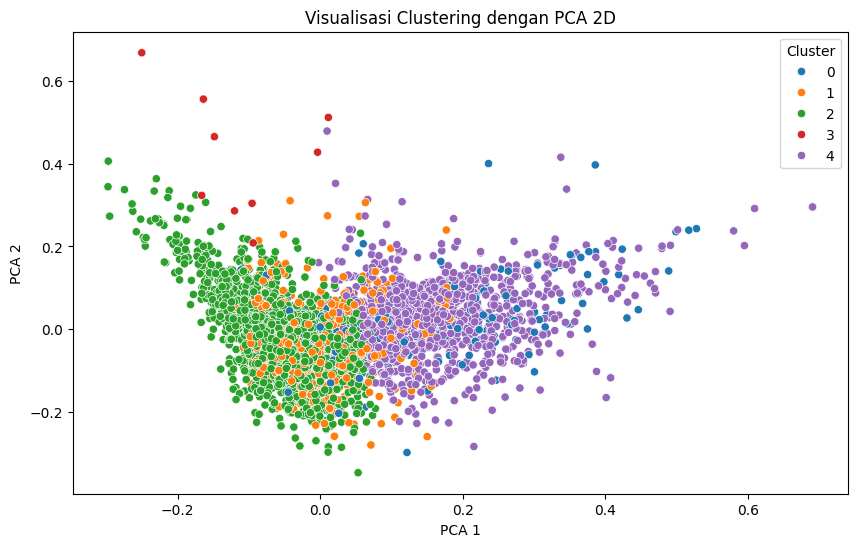

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 4. PCA untuk reduksi dimensi ke 2D ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# --- 5. Plot hasil PCA dan cluster ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster',
    palette='tab10',
    data=df,
    legend='full'
)
plt.title('Visualisasi Clustering dengan PCA 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()
